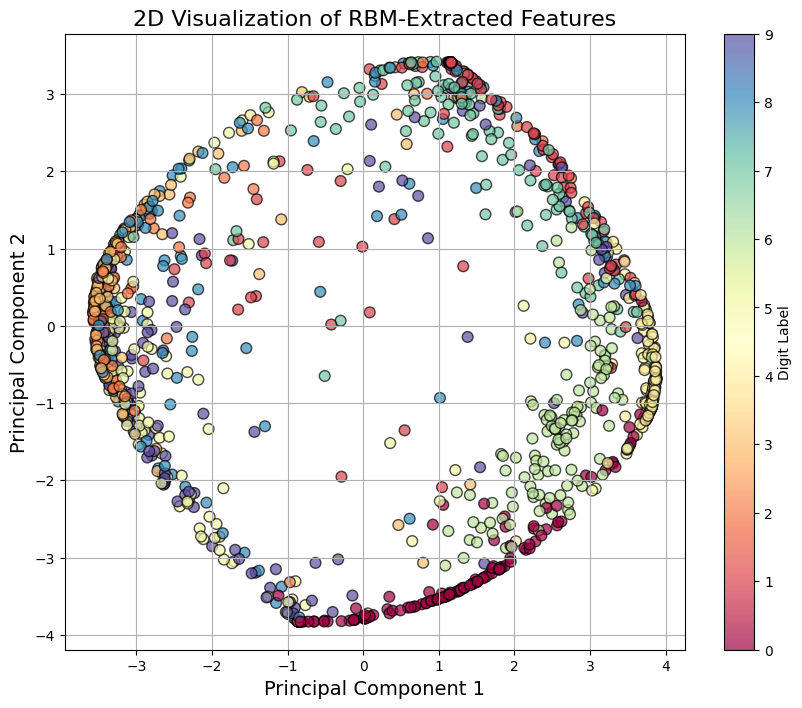

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        53
           1       0.71      0.72      0.71        50
           2       0.76      0.74      0.75        47
           3       0.58      0.61      0.59        54
           4       0.88      0.93      0.90        60
           5       0.84      0.56      0.67        66
           6       0.89      0.94      0.92        53
           7       0.79      0.76      0.78        55
           8       0.34      0.35      0.34        43
           9       0.64      0.66      0.65        59

    accuracy                           0.72       540
   macro avg       0.72      0.72      0.71       540
weighted avg       0.73      0.72      0.72       540



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neural_network import BernoulliRBM

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rbm = BernoulliRBM(n_components=64, learning_rate=0.01, batch_size=10, n_iter=10, random_state=42)
rbm.fit(X_train)

X_train_rbm = rbm.transform(X_train)
X_test_rbm = rbm.transform(X_test)

pca = PCA(n_components=2)
X_train_rbm_2d = pca.fit_transform(X_train_rbm)
X_test_rbm_2d = pca.transform(X_test_rbm)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_rbm_2d[:, 0], X_train_rbm_2d[:, 1], c=y_train, cmap='Spectral', edgecolor='k', s=60, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.title("2D Visualization of RBM-Extracted Features", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.show()

classifier = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, random_state=42)
classifier.fit(X_train_rbm, y_train)
y_pred = classifier.predict(X_test_rbm)
print(classification_report(y_test, y_pred))
